In [1]:
from pathlib import Path
from pprint import pprint

import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
from PIL import Image

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.layers import Conv2D, Dense, Dropout, GlobalMaxPooling2D, Input, Flatten, MaxPooling2D, Lambda, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# paths to train and test data
train_data_dir = 'C:/Users/miche/Tesi/train_data_real'
test_data_dir = 'C:/Users/miche/Tesi/test_data_real'

In [3]:
# creating generators
datagen = ImageDataGenerator(rescale=1 / 255.0)

train_batch_size, test_batch_size = 21, 122
train_generator = datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=train_batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42)

test_generator = datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(48, 48),
    color_mode="rgb",
    batch_size=test_batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42)

Found 21 images belonging to 10 classes.
Found 122 images belonging to 10 classes.


In [4]:
train_dataset, y_train = next(train_generator)
test_dataset, y_test = next(test_generator)

train_labels = np.empty(len(y_train), dtype=int)
test_labels = np.empty(len(y_test), dtype=int)

for i in range(len(y_train)):
    train_labels[i] = (np.where(y_train[i]==1)[0][0])
for j in range(len(y_test)):
    test_labels[j] = (np.where(y_test[j]==1)[0][0])

stampa = test_dataset

In [5]:
def stampa(ds, ds_labels, class_names):
  fig = plt.figure()
  for i in range(9):
      plt.subplot(3,3,i+1)
      plt.tight_layout()
      plt.imshow(ds[i])
      plt.title("Oggetto: {}".format(class_names[train_labels[i]]))
      plt.xticks([])
      plt.yticks([])

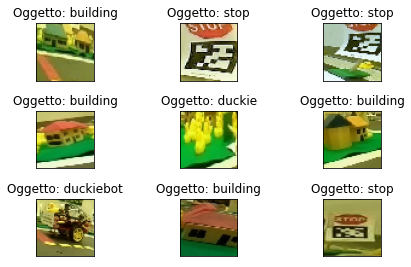

In [6]:
# plotting some samples
CLASS_NAMES = ['barrier','building','bus','cone','duckie','duckiebot','stop','trafficlight','tree','truck']
stampa(train_dataset, train_labels, CLASS_NAMES)

In [7]:
model = load_model("C:/Users/miche/Tesi/results/simulator_3.h5")
loss_and_metrics = model.evaluate(test_dataset, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

122/122 - 0s - loss: 6.4637 - accuracy: 0.2213
Test Loss 6.4636940408925545
Test Accuracy 0.22131148


In [8]:
predicted_classes_crossentropy = model.predict_classes(test_dataset)

# see which we predicted correctly and which not
correct_indices_crossentropy = np.nonzero(predicted_classes_crossentropy == test_labels)[0]
incorrect_indices_crossentropy = np.nonzero(predicted_classes_crossentropy != test_labels)[0]
print()
print(len(correct_indices_crossentropy)," classified correctly")
print(len(incorrect_indices_crossentropy)," classified incorrectly")


27  classified correctly
95  classified incorrectly


In [9]:
import time

In [10]:
t0= time.clock()
model.predict(test_dataset)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")

Time elapsed:  0.2031858  seconds


In [11]:
prova = test_dataset[0]
prova = prova.reshape(1,48,48,3)
t0= time.clock()
model.predict(prova)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")

Time elapsed:  0.05943159999999997  seconds


In [12]:
def stampa_eval(correct_indices, incorrect_indices, predicted_classes):
  # adapt figure size to accomodate 18 subplots
  plt.rcParams['figure.figsize'] = (14,14)

  figure_evaluation = plt.figure()

  # plot 9 correct predictions
  for i, correct in enumerate(correct_indices[:9]):
      plt.subplot(6,3,i+1)
      plt.imshow(test_dataset[correct], interpolation='none')
      plt.title(
        "Predicted: {}, Truth: {}".format(CLASS_NAMES[predicted_classes[correct]],
                                          CLASS_NAMES[test_labels[correct]]))
      plt.xticks([])
      plt.yticks([])

  # plot 9 incorrect predictions
  for i, incorrect in enumerate(incorrect_indices[:9]):
      plt.subplot(6,3,i+10)
      plt.imshow(test_dataset[incorrect], interpolation='none')
      plt.title(
        "Predicted: {}, Truth: {}".format(CLASS_NAMES[predicted_classes[incorrect]], 
                                        CLASS_NAMES[test_labels[incorrect]]))
      plt.xticks([])
      plt.yticks([])

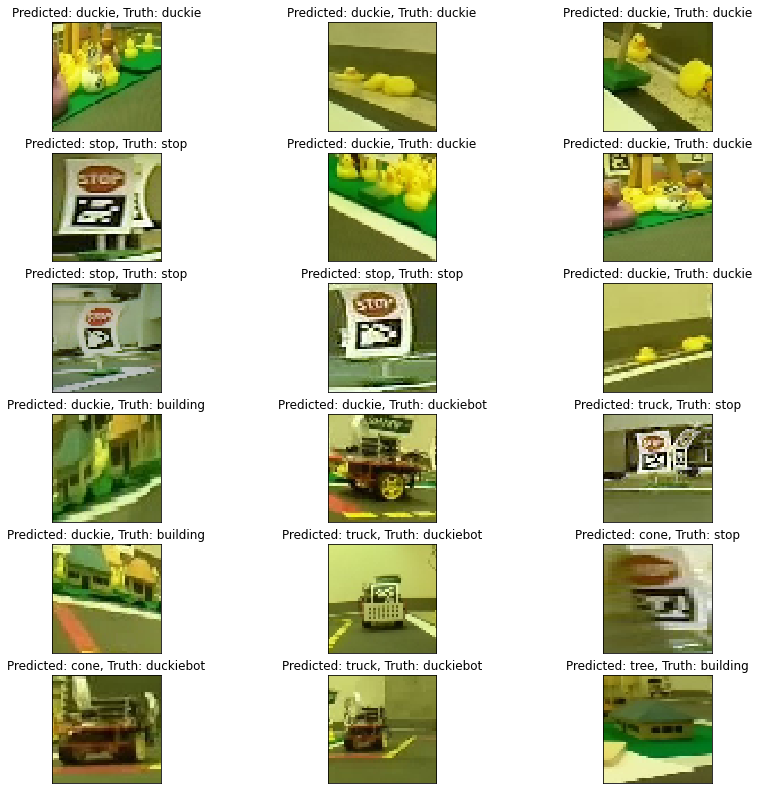

In [13]:
stampa_eval(correct_indices_crossentropy, incorrect_indices_crossentropy, predicted_classes_crossentropy)

In [14]:
model.fit(train_dataset, y_train,
          batch_size=5, epochs=150,
          verbose=2,
          validation_data=(test_dataset, y_test))

Train on 21 samples, validate on 122 samples
Epoch 1/150
21/21 - 1s - loss: 7.2982 - accuracy: 0.3333 - val_loss: 3.3473 - val_accuracy: 0.2377
Epoch 2/150
21/21 - 0s - loss: 4.7276 - accuracy: 0.3810 - val_loss: 2.0481 - val_accuracy: 0.3934
Epoch 3/150
21/21 - 0s - loss: 3.8224 - accuracy: 0.5238 - val_loss: 2.2189 - val_accuracy: 0.4016
Epoch 4/150
21/21 - 0s - loss: 2.8073 - accuracy: 0.3810 - val_loss: 1.3545 - val_accuracy: 0.5738
Epoch 5/150
21/21 - 0s - loss: 2.6491 - accuracy: 0.4762 - val_loss: 1.5331 - val_accuracy: 0.5902
Epoch 6/150
21/21 - 0s - loss: 3.6275 - accuracy: 0.5238 - val_loss: 1.3401 - val_accuracy: 0.5000
Epoch 7/150
21/21 - 0s - loss: 1.4191 - accuracy: 0.5238 - val_loss: 0.8903 - val_accuracy: 0.6967
Epoch 8/150
21/21 - 0s - loss: 1.4734 - accuracy: 0.7143 - val_loss: 0.9721 - val_accuracy: 0.6230
Epoch 9/150
21/21 - 0s - loss: 1.0290 - accuracy: 0.5238 - val_loss: 2.0608 - val_accuracy: 0.2705
Epoch 10/150
21/21 - 0s - loss: 1.7776 - accuracy: 0.5714 - val_

Epoch 83/150
21/21 - 0s - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.2803 - val_accuracy: 0.9098
Epoch 84/150
21/21 - 0s - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.2956 - val_accuracy: 0.8934
Epoch 85/150
21/21 - 0s - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.3190 - val_accuracy: 0.8770
Epoch 86/150
21/21 - 0s - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.2873 - val_accuracy: 0.9098
Epoch 87/150
21/21 - 0s - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.2794 - val_accuracy: 0.9098
Epoch 88/150
21/21 - 0s - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.2762 - val_accuracy: 0.9098
Epoch 89/150
21/21 - 0s - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.2757 - val_accuracy: 0.9098
Epoch 90/150
21/21 - 0s - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.2809 - val_accuracy: 0.9180
Epoch 91/150
21/21 - 0s - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.2770 - val_accuracy: 0.9098
Epoch 92/150
21/21 - 0s - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.2780 - val_accuracy: 0.9098


In [15]:
loss_and_metrics = model.evaluate(test_dataset, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

122/122 - 0s - loss: 0.2550 - accuracy: 0.9344
Test Loss 0.2549963285688494
Test Accuracy 0.93442625


In [16]:
predicted_classes_crossentropy = model.predict_classes(test_dataset)

# see which we predicted correctly and which not
correct_indices_crossentropy = np.nonzero(predicted_classes_crossentropy == test_labels)[0]
incorrect_indices_crossentropy = np.nonzero(predicted_classes_crossentropy != test_labels)[0]
print()
print(len(correct_indices_crossentropy)," classified correctly")
print(len(incorrect_indices_crossentropy)," classified incorrectly")


114  classified correctly
8  classified incorrectly


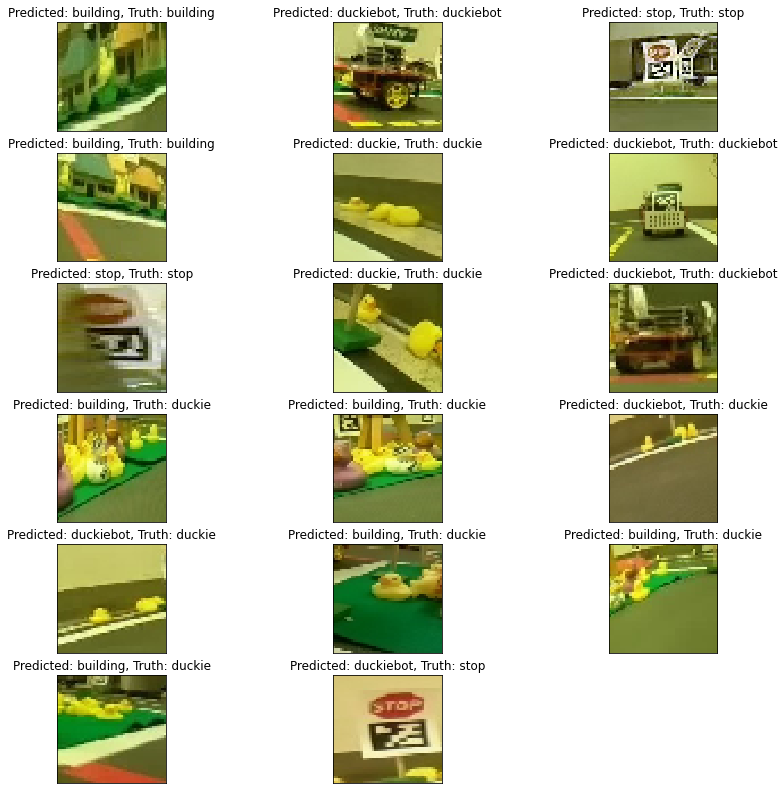

In [17]:
stampa_eval(correct_indices_crossentropy, incorrect_indices_crossentropy, predicted_classes_crossentropy)

In [18]:
t0= time.clock()
model.predict(test_dataset)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")

Time elapsed:  0.17322360000000003  seconds


In [19]:
prova = test_dataset[0]
prova = prova.reshape(1,48,48,3)
t0= time.clock()
model.predict(prova)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")

Time elapsed:  0.07470279999999718  seconds


In [43]:
dir = 'C:/Users/miche/Tesi/tests'
list_ds = tf.data.Dataset.list_files(dir+'*/*.jpg')

In [44]:
for f in list_ds.take(5):
  print(f.numpy())

b'C:\\Users\\miche\\Tesi\\tests\\prove\\prova7.jpg'
b'C:\\Users\\miche\\Tesi\\tests\\prove\\prova5.jpg'
b'C:\\Users\\miche\\Tesi\\tests\\prove\\prova1.jpg'


In [45]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

In [69]:
IMG_HEIGHT, IMG_WIDTH = 96, 144
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])

In [70]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [71]:
import os
AUTOTUNE = tf.data.experimental.AUTOTUNE
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
for image, label in labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (96, 144, 3)
Label:  [False False False False False False False False False False]


In [72]:
def prepare_for_training(ds, batch_size, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(batch_size)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [73]:
data = prepare_for_training(labeled_ds, batch_size=3)
image_batch, labels = next(iter(data))

(-0.5, 143.5, 95.5, -0.5)

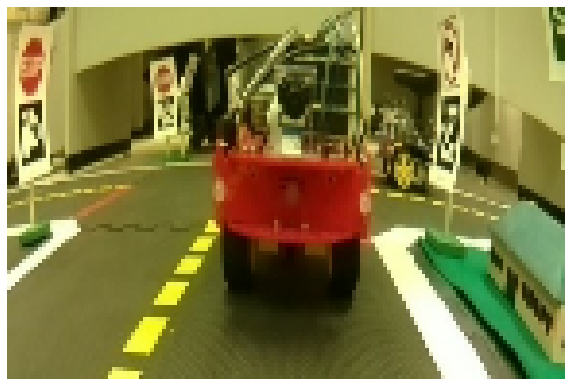

In [74]:
plt.figure(figsize=(10,10))
plt.imshow(image_batch[0])
plt.axis('off')

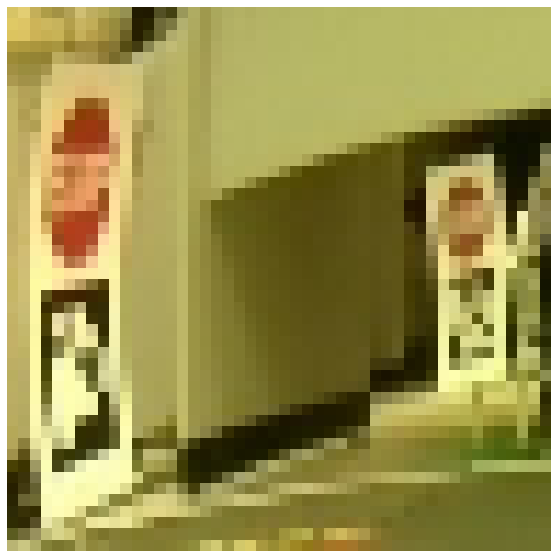

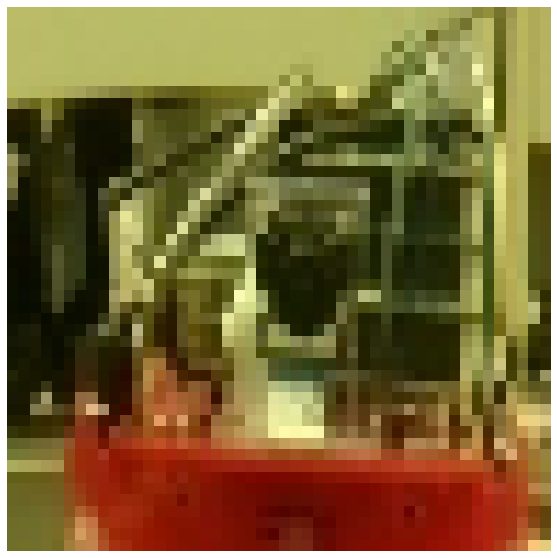

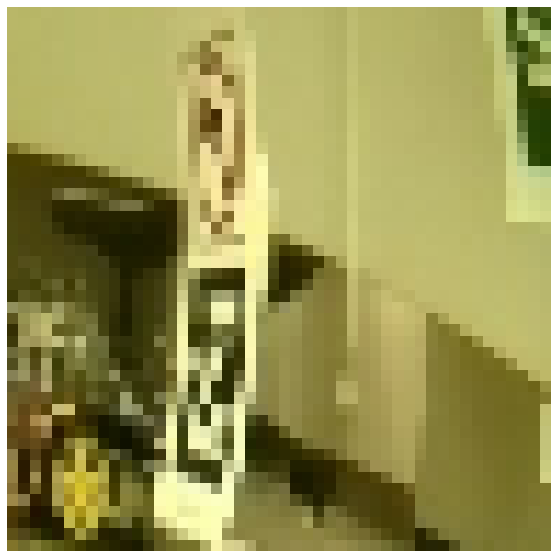

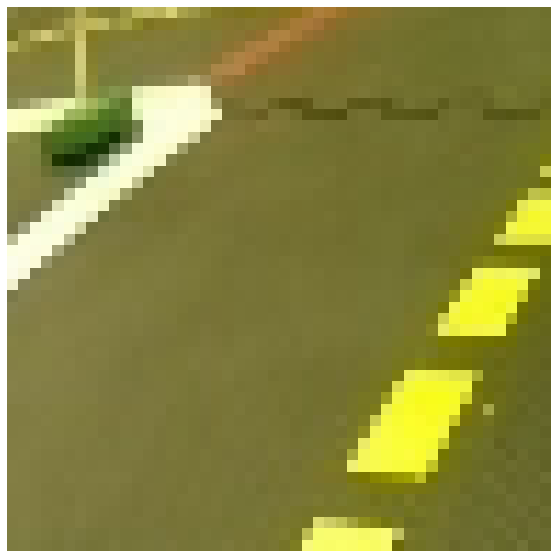

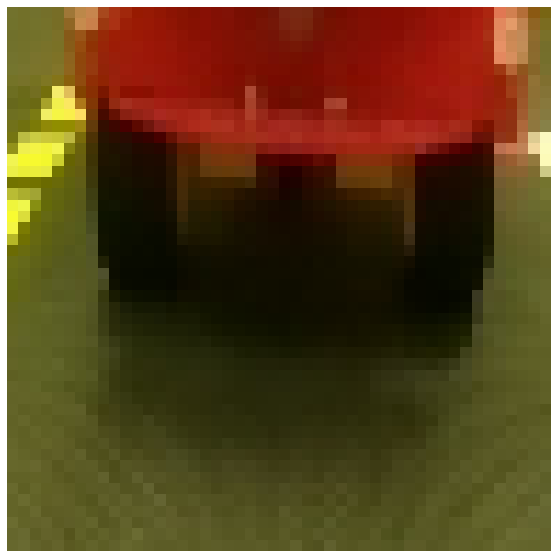

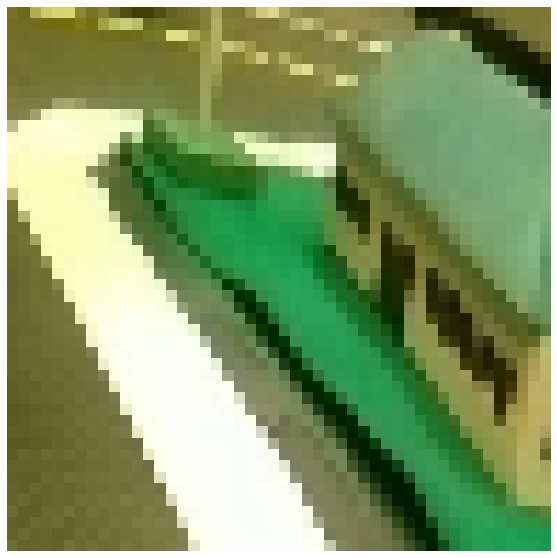

In [75]:
t0= time.clock()
image = image_batch[0]
patches = []
for i in range(2):
  for j in range(3):
    patch = tf.image.crop_to_bounding_box(image, i*48, j*48, 48, 48)
    patches.append(patch)
    plt.figure(figsize=(10,10))
    plt.imshow(patch)
    plt.axis('off')

In [76]:
batch = np.array(patches)
print(batch.shape)

(6, 48, 48, 3)


In [77]:
predicted_classes = model.predict_classes(batch)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")
print(predicted_classes)

Time elapsed:  7.221300100000008  seconds
[5 5 1 4 5 1]


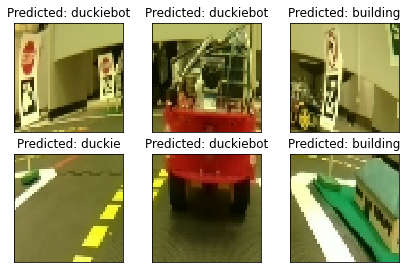

In [78]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

for i in range(6):
    plt.subplot(6,3,i+1)
    plt.imshow(patches[i], interpolation='none')
    plt.title(
      "Predicted: {}".format(CLASS_NAMES[predicted_classes[i]]))
    plt.xticks([])
    plt.yticks([])

(-0.5, 143.5, 95.5, -0.5)

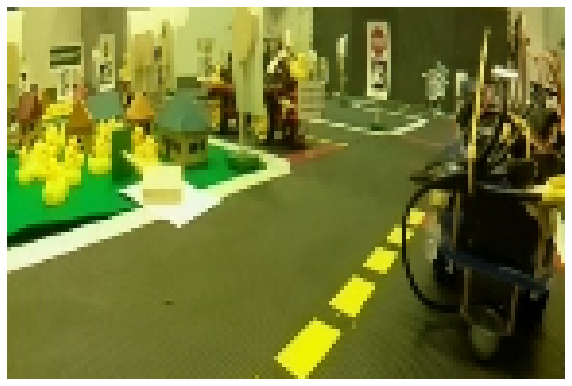

In [79]:
plt.figure(figsize=(10,10))
plt.imshow(image_batch[1])
plt.axis('off')

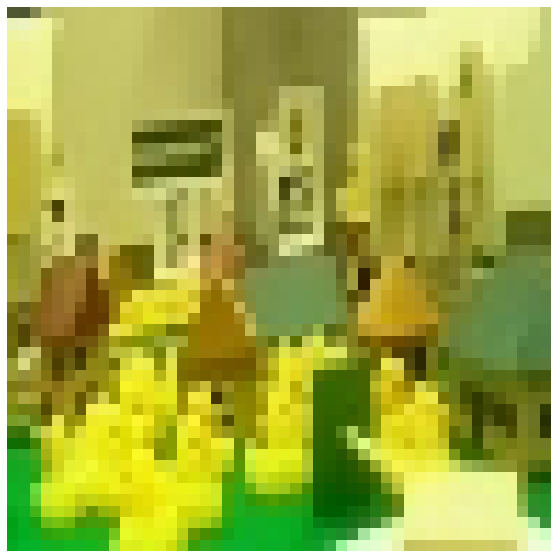

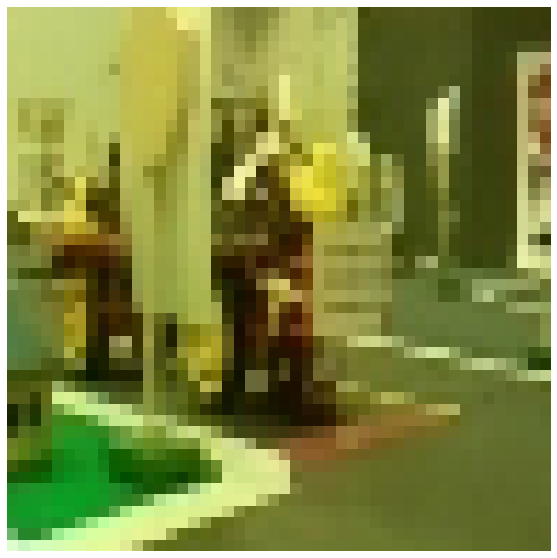

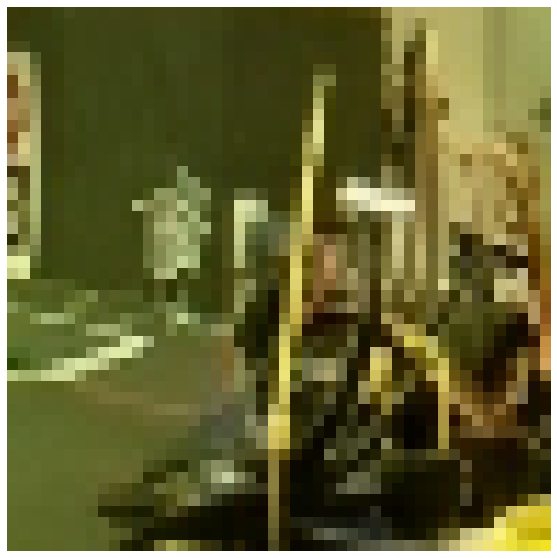

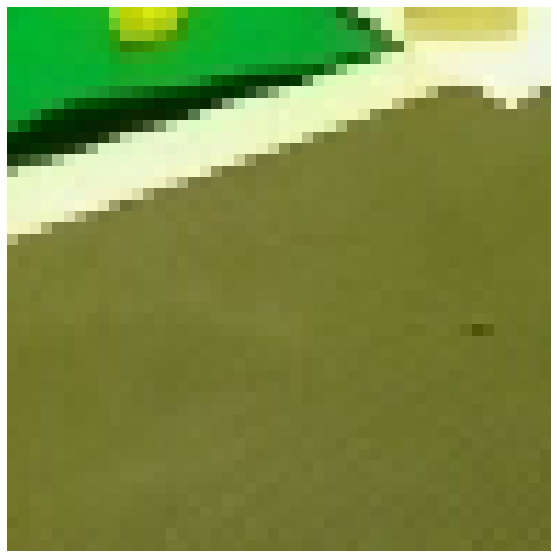

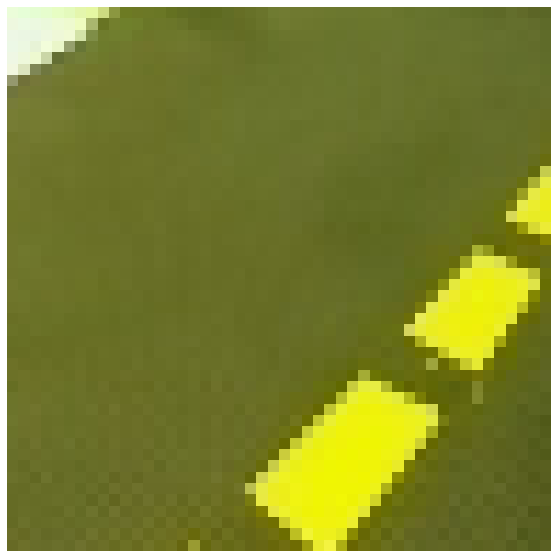

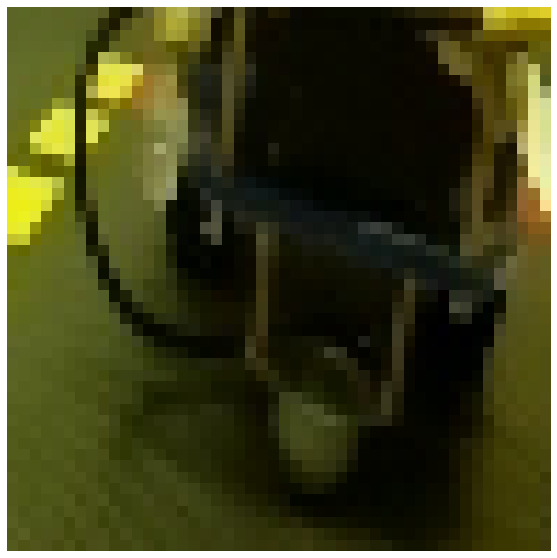

In [80]:
t0= time.clock()
image = image_batch[1]
patches = []
for i in range(2):
  for j in range(3):
    patch = tf.image.crop_to_bounding_box(image, i*48, j*48, 48, 48)
    patches.append(patch)
    plt.figure(figsize=(10,10))
    plt.imshow(patch)
    plt.axis('off')

In [81]:
batch = np.array(patches)
print(batch.shape)

(6, 48, 48, 3)


In [82]:
predicted_classes = model.predict_classes(batch)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")
print(predicted_classes)

Time elapsed:  6.894873400000051  seconds
[4 1 5 1 4 1]


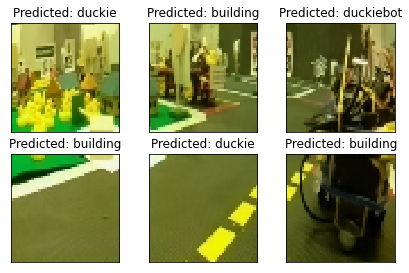

In [83]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

for i in range(6):
    plt.subplot(6,3,i+1)
    plt.imshow(patches[i], interpolation='none')
    plt.title(
      "Predicted: {}".format(CLASS_NAMES[predicted_classes[i]]))
    plt.xticks([])
    plt.yticks([])

(-0.5, 143.5, 95.5, -0.5)

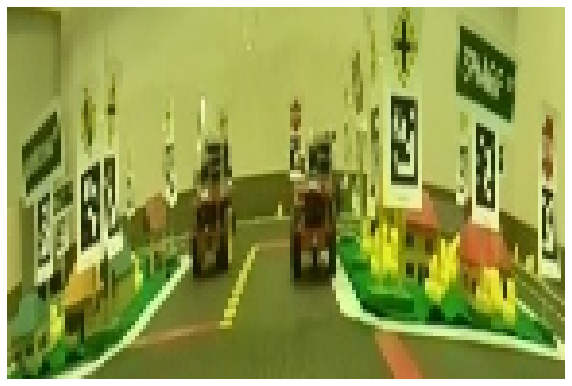

In [84]:
plt.figure(figsize=(10,10))
plt.imshow(image_batch[2])
plt.axis('off')

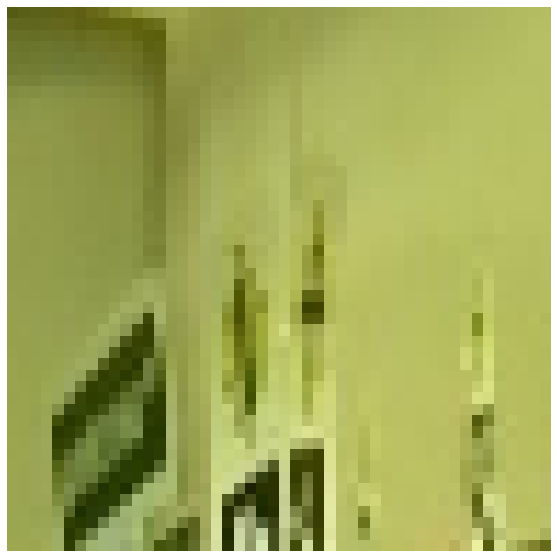

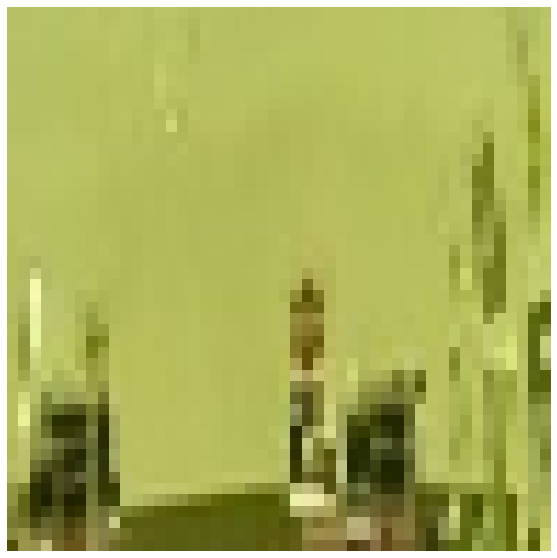

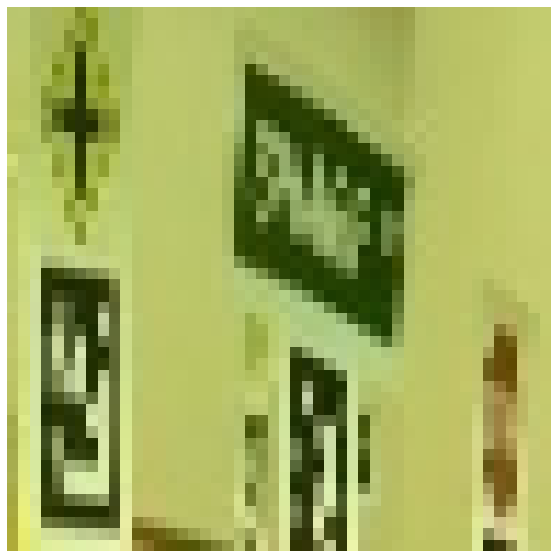

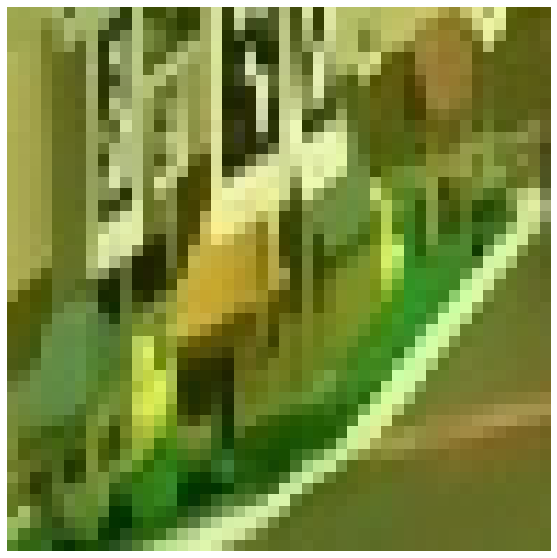

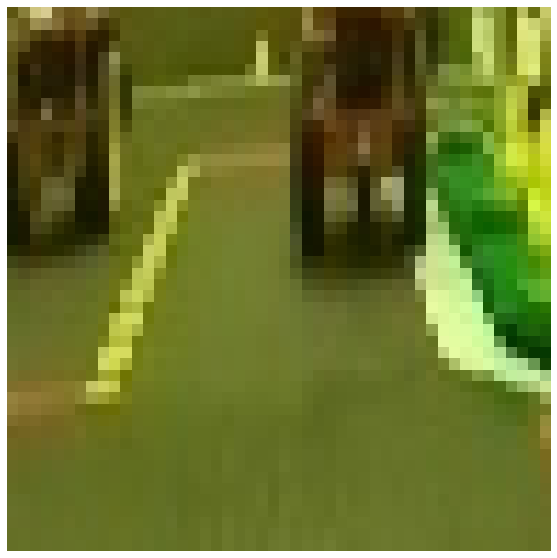

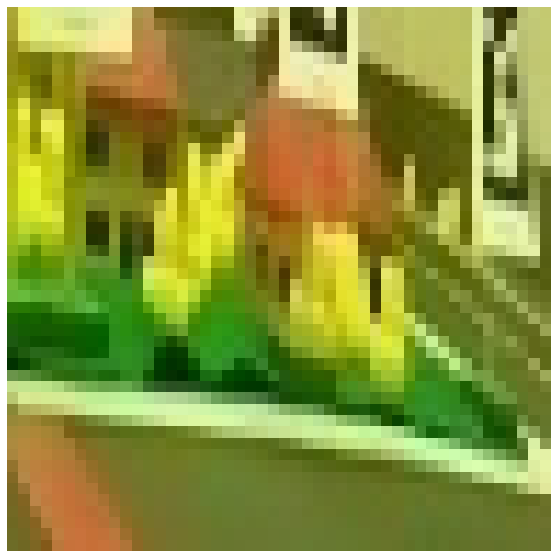

In [85]:
t0= time.clock()
image = image_batch[2]
patches = []
for i in range(2):
  for j in range(3):
    patch = tf.image.crop_to_bounding_box(image, i*48, j*48, 48, 48)
    patches.append(patch)
    plt.figure(figsize=(10,10))
    plt.imshow(patch)
    plt.axis('off')

In [86]:
batch = np.array(patches)
print(batch.shape)

(6, 48, 48, 3)


In [87]:
predicted_classes = model.predict_classes(batch)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")
print(predicted_classes)

Time elapsed:  6.299264200000039  seconds
[1 1 1 1 1 1]


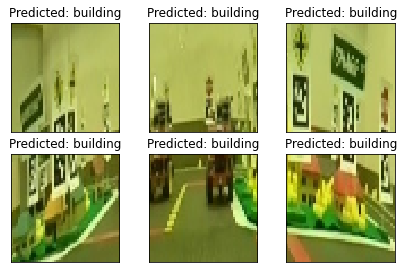

In [88]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

for i in range(6):
    plt.subplot(6,3,i+1)
    plt.imshow(patches[i], interpolation='none')
    plt.title(
      "Predicted: {}".format(CLASS_NAMES[predicted_classes[i]]))
    plt.xticks([])
    plt.yticks([])